In [4]:
# define a pytensor Op for our likelihood function
import glob
import importlib
import os

import matplotlib.pyplot as plt
import numpy as np

from pl_temp_fit import (
    Exp_data_utils,
    config_utils,
    covariance_utils,
    fit_el_utils,
    generate_data_utils,
)

os.chdir("/media/mohammed/Work/Work/pl_temp_fit/")


In [5]:
# read csv data from folder


csv_files = glob.glob("experiemental_data/blends/*.csv")
for id, file in enumerate(csv_files):
    print(id, file)


0 experiemental_data/blends/PM6Y61_1_test_PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1PL.csv
3 experiemental_data/blends/PM6Y61_1EL.csv


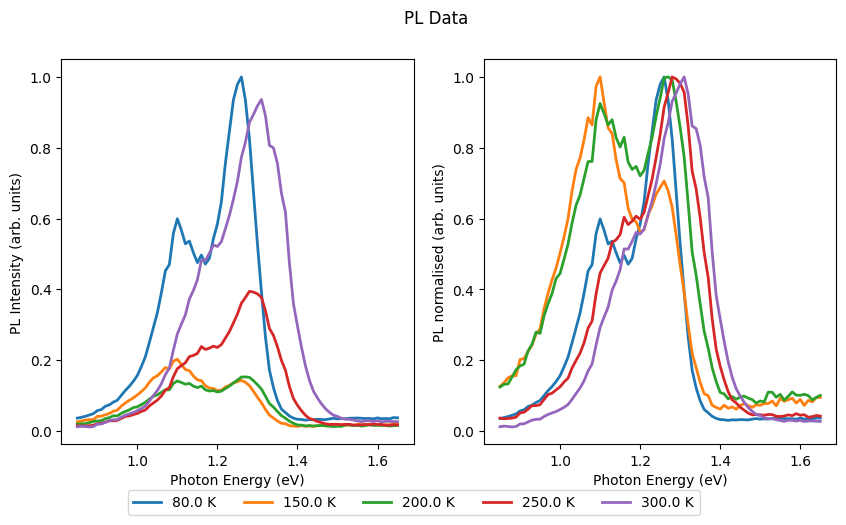

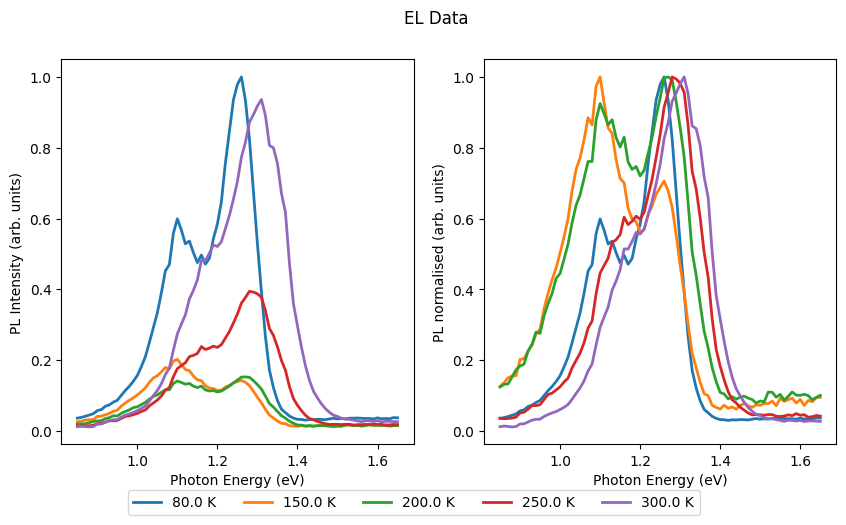

In [6]:
# plot EL and PL data
csv_name_pl=csv_files[3]#3 for y6, 18 for ITIC,12 for L8BO
csv_name_el=csv_files[1]#3 for y6, 18 for ITIC,12 for L8BO
Exp_data_pl, temperature_list_pl, hws_pl = Exp_data_utils.read_data(csv_name_pl)
fig,ax = Exp_data_utils.plot_pl_data(Exp_data_pl, temperature_list_pl, hws_pl,title="PL Data")
Exp_data_el, temperature_list_el, hws_el = Exp_data_utils.read_data(csv_name_el)
fig,ax = Exp_data_utils.plot_pl_data(Exp_data_el, temperature_list_el, hws_el,title="EL Data")

In [10]:
# initialise parameters for the model

importlib.reload(config_utils)
from pathlib import Path
(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    relative_intensity_std_error_el,
    sigma,
) = (5, 10, 0.005, 0.05, 0.1,0.001)
fixed_parameters_dict = {
    "EX":{},
    "CT":{"off":0,"sigma":0.001},  
    "D":{},
}
params_to_fit_init ={
    "EX":{"E":1.37,"sigma":0.001,"Li":7.8e-2,"Lo":0.11,"hO":0.159},
    "CT":{"E":1.2,"Li":7.8e-2,"Lo":0.11,"hO":0.159,"log_fosc":-3},
    "D":{"log_kEXCT":10},
}
min_bounds = {
    "EX":{"E":1.3,"sigma":0.001,"Li":0.03,"Lo":0.03,"hO":0.1},
    "CT":{"E":0.8,"Li":0.03,"Lo":0.03,"hO":0.1,"log_fosc":-5},
    "D":{"log_kEXCT":8},
}
max_bounds = {
    "EX":{"E":1.5,"sigma":0.03,"Li":0.2,"Lo":0.2,"hO":0.2},
    "CT":{"E":1.35,"Li":0.2,"Lo":0.2,"hO":0.2,"log_fosc":-1},
    "D":{"log_kEXCT":12},
}
# save the model config
model_config, test_id = config_utils.save_model_config(
    Path(csv_name_pl),
    Path(csv_name_el),
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    relative_intensity_std_error_el,
    temperature_list_pl,
    hws_pl,
    temperature_list_el,
    hws_el,
    sigma,
    fixed_parameters_dict,
    params_to_fit_init,
    min_bounds,
    max_bounds,
)

size of hw is (81,)
size of temperature_list is (5,)


In [8]:
model_config,model_config_save = config_utils.load_model_config(test_id)
fixed_parameters_dict, params_to_fit, min_bound, max_bound = config_utils.get_dict_params(model_config_save)
model_config["temperature_list_el"] = temperature_list_el
model_config["hws_el"] = hws_el
model_config["temperature_list_pl"] = temperature_list_pl
model_config["hws_pl"] = hws_pl
save_folder = model_config_save["save_folder"]

NameError: name 'test_id' is not defined

shape of mean value plot is (81, 4)
shape of mean value plot is (81, 4)


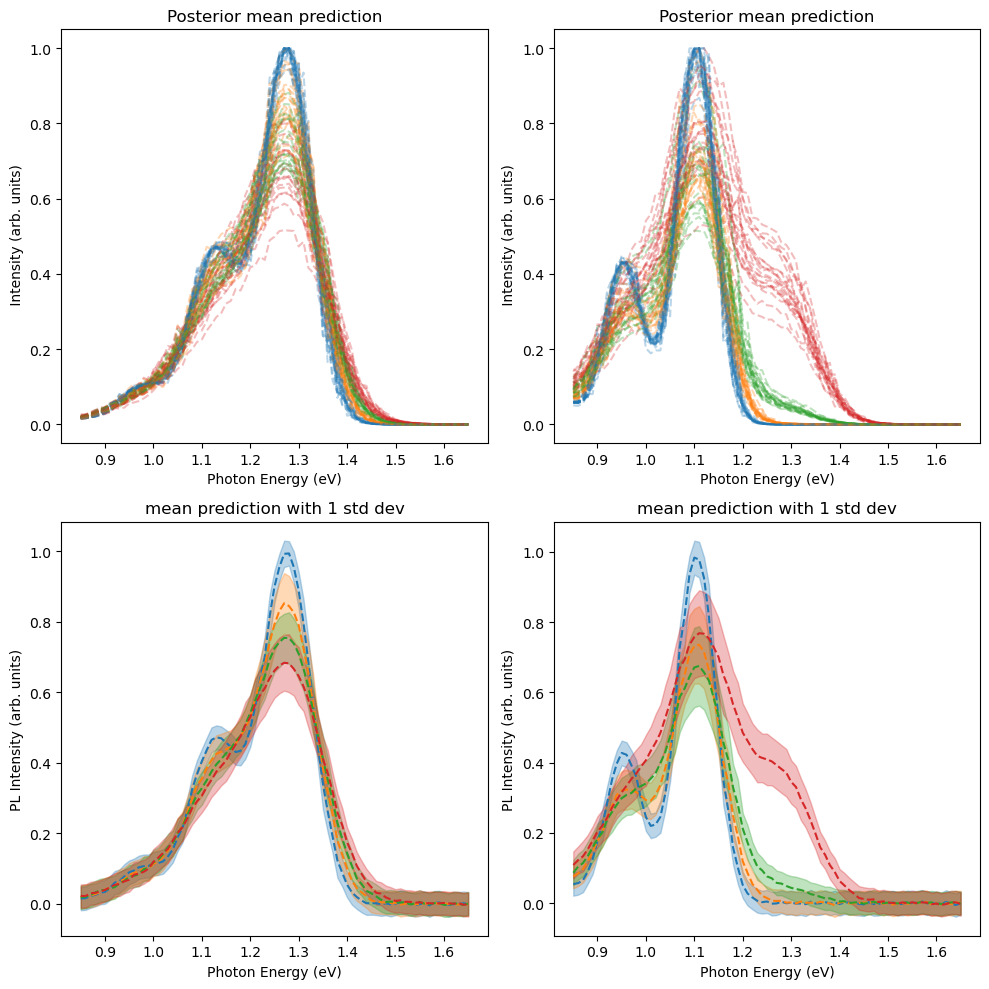

In [ ]:
#%autoreload 2

import importlib

importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
# get the variance of the data and plot it

co_var_mat_pl, co_var_mat_el, variance_el, variance_pl = (
    covariance_utils.plot_generated_data(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit=params_to_fit_init,
    )
)

In [ ]:

import importlib

importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
importlib.reload(fit_el_utils)

soln = fit_el_utils.get_maximum_likelihood_estimate(
    Exp_data_el,
    Exp_data_pl,
    co_var_mat_pl,
    co_var_mat_el,
    model_config,
    save_folder,
    num_coords=1,
    fixed_parameters_dict=fixed_parameters_dict,
    params_to_fit=params_to_fit_init,
    min_bound=min_bounds,
    max_bound=max_bounds,
)

running the minimisation
step 0
[ 1.38973696e+00  1.00000000e-03  7.70489895e-02  1.11012107e-01
  1.58922513e-01  1.28639652e+00  8.00799761e-02  1.09377324e-01
  1.60495873e-01 -4.36984532e+00  8.64165447e+00]
Maximum likelihood estimates:
  EX_E = 1.390
  EX_sigma = 0.001
  EX_LI = 0.077
  EX_L0 = 0.111
  EX_H0 = 0.159
  CT_E = 1.286
  CT_LI = 0.080
  CT_L0 = 0.109
  CT_H0 = 0.160
  CT_log_fosc = -4.370
  D_log_kEXCT = 8.642
Maximum log likelihood: 2398.570656704775


(<Figure size 2000x500 with 4 Axes>,
 array([<Axes: title={'center': 'temperature=150.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=200.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=250.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=300.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>],
       dtype=object))

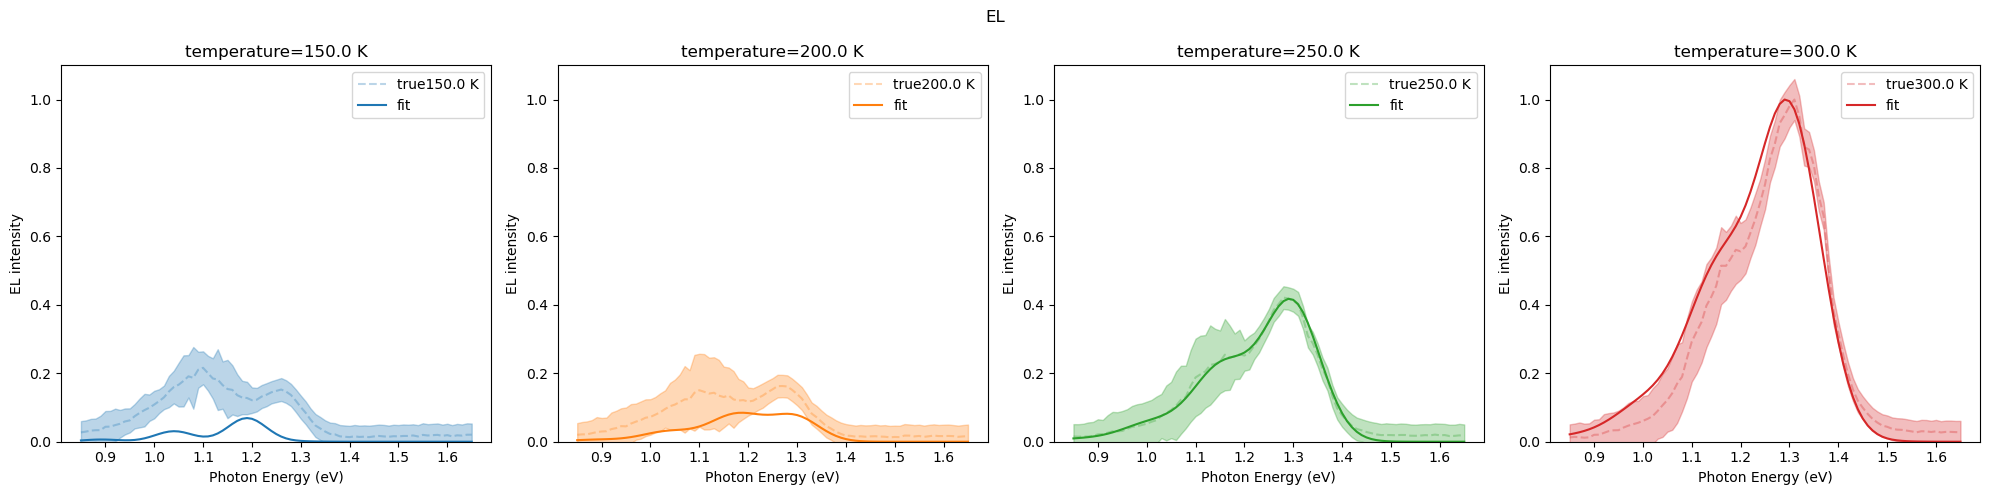

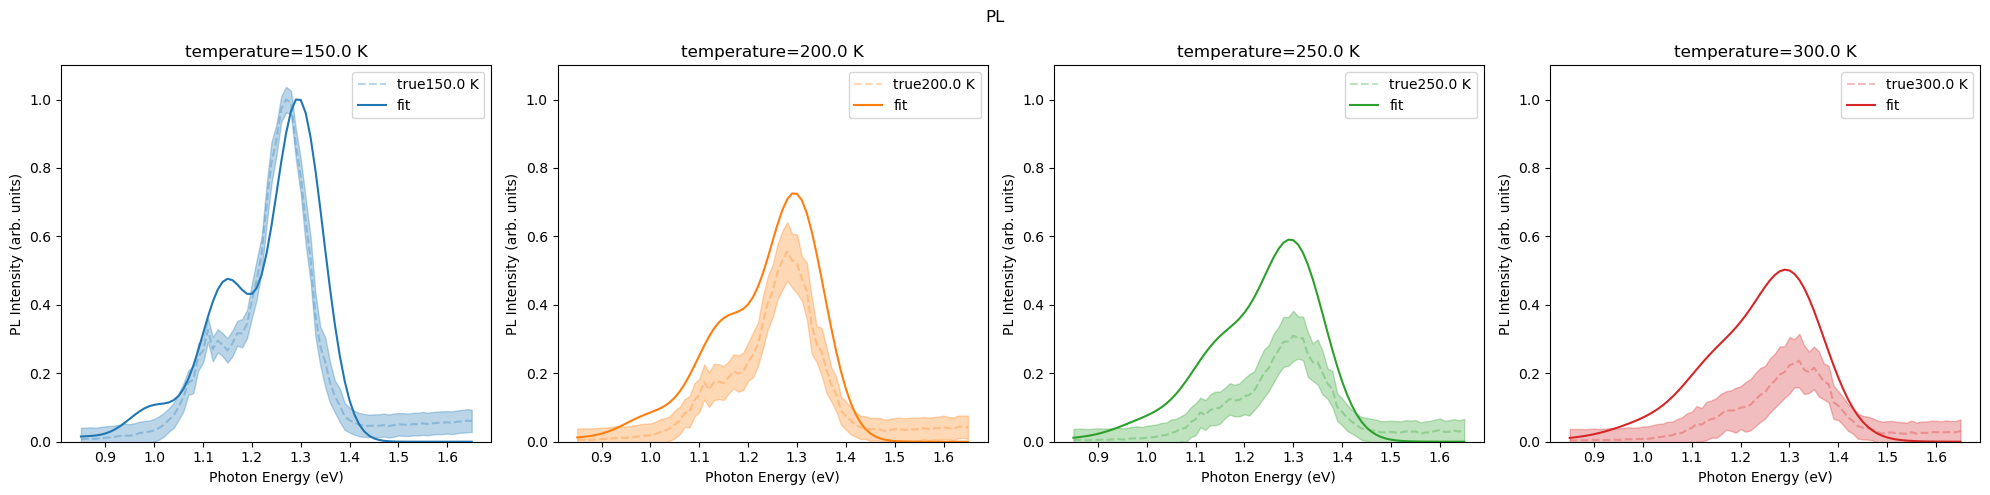

In [ ]:
importlib.reload(fit_el_utils)

true_parameters = fit_el_utils.get_param_dict(params_to_fit_init,soln.x)
fit_el_utils.plot_exp_data_with_variance(
    temperature_list_el,
    hws_el,
    temperature_list_pl,
    hws_pl,
    variance_el,
    variance_pl,
    save_folder,
    fixed_parameters_dict,
    true_parameters,
    Exp_data_pl,
    Exp_data_el,
)

shape of mean value plot is (81, 4)
shape of mean value plot is (81, 4)


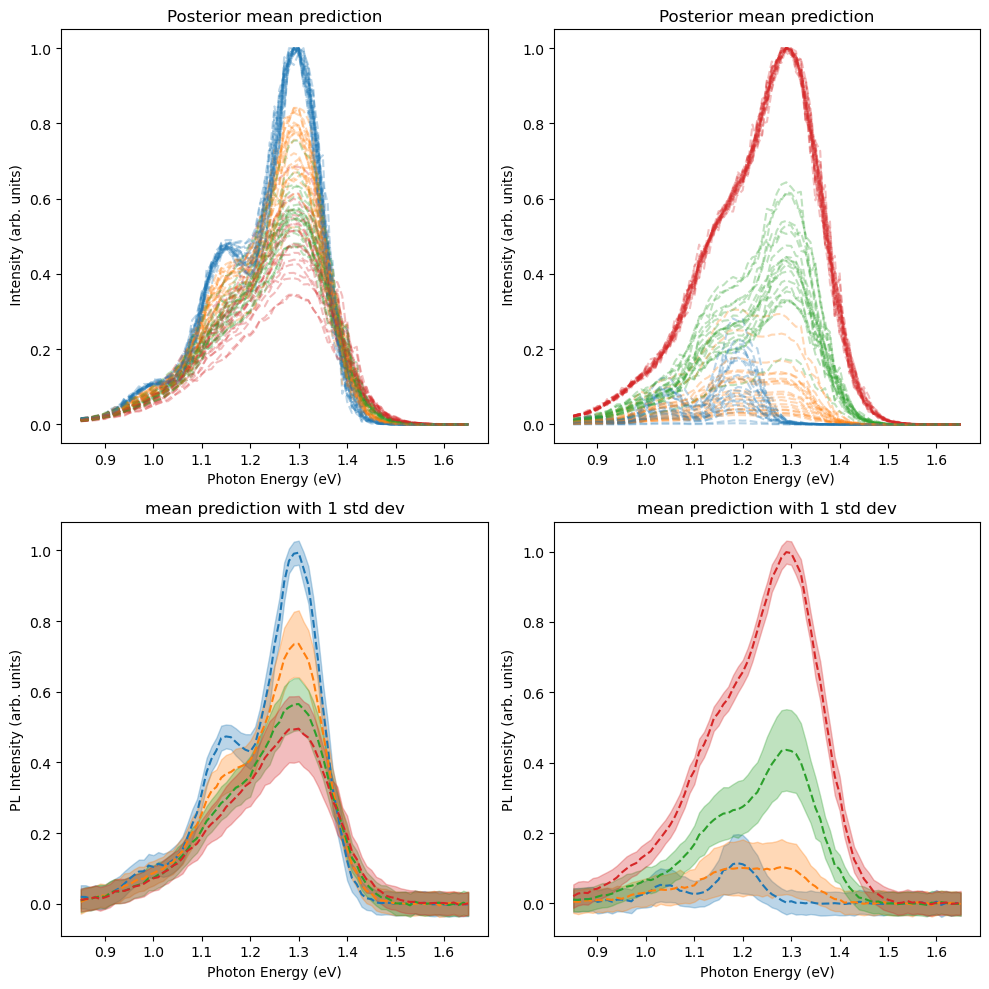

In [ ]:
co_var_mat_pl, co_var_mat_el, variance_el, variance_pl = (
    covariance_utils.plot_generated_data(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit=true_parameters,
    )
)

In [ ]:

importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)

fit_el_utils.run_sampler_single(
    save_folder,
    Exp_data_el,
    Exp_data_pl,
    co_var_mat_el,
    co_var_mat_pl,
    params_to_fit_init,
    fixed_parameters_dict,
    min_bounds,
    max_bounds,
    model_config,
    nsteps=5,
    coeff_spread=1,
    num_coords = 32,
)


Initial size: 0


  0%|          | 0/5 [00:00<?, ?it/s]/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5/5 [01:50<00:00, 22.00s/it]

single process took 133.5 seconds


## submitting jobs to the hpc


In [ ]:
# submit to HPC
import glob

csv_files = glob.glob("experiemental_data/blends/*.csv")
for id,csv_file in enumerate(csv_files):
    print(id,csv_file)


0 experiemental_data/blends/PM6Y61_1PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1EL.csv
3 experiemental_data/blends/PM6Y61_1_test_PL.csv


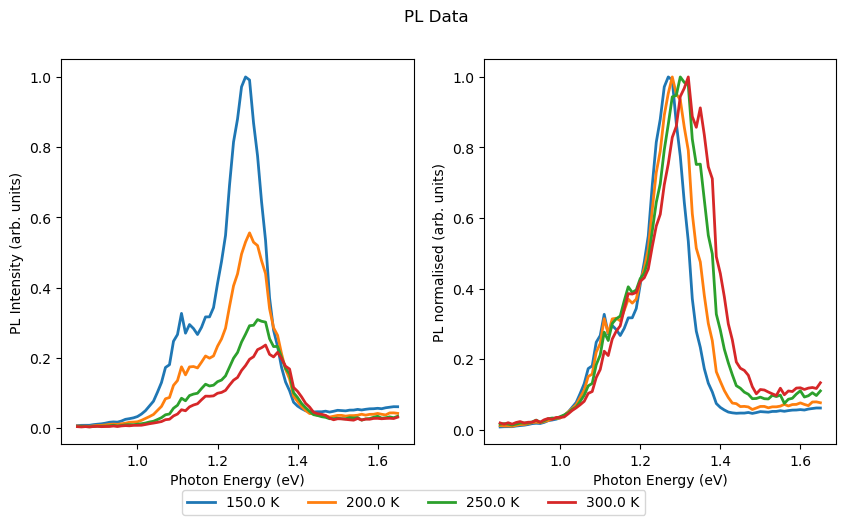

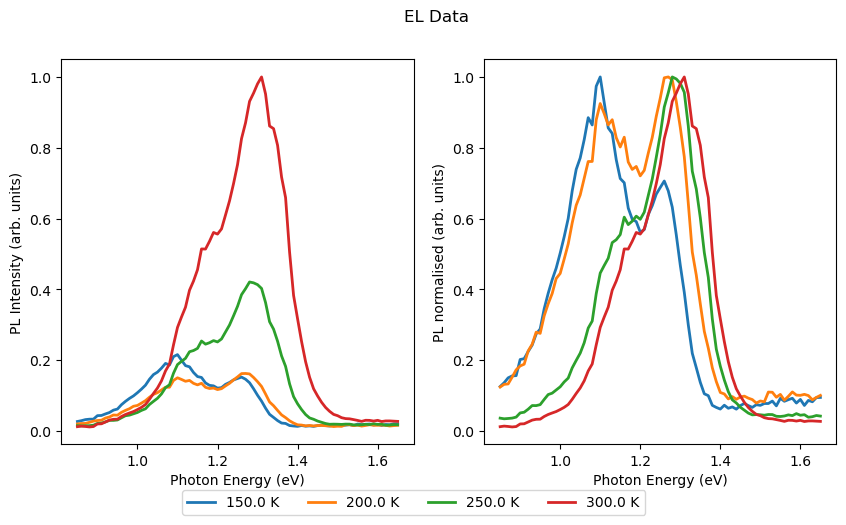

In [ ]:
# plot EL and PL data
csv_name_pl=csv_files[3]
csv_name_el=csv_files[1]
Exp_data_pl, temperature_list_pl, hws_pl = Exp_data_utils.read_data(csv_name_pl)
fig,ax = Exp_data_utils.plot_pl_data(Exp_data_pl, temperature_list_pl, hws_pl,title="PL Data")
Exp_data_el, temperature_list_el, hws_el = Exp_data_utils.read_data(csv_name_el)
fig,ax = Exp_data_utils.plot_pl_data(Exp_data_el, temperature_list_el, hws_el,title="EL Data")

In [ ]:
# initialise parameters for the model

importlib.reload(config_utils)

(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    relative_intensity_std_error_el,
    sigma,
) = (5, 10, 0.005, 0.02, 0.02,0.001)

fixed_parameters_dict = {
    "EX":{},
    "CT":{"off":0,"sigma":0.001},  
    "D":{},
}
params_to_fit_init ={
    "EX":{"E":1.42,"sigma":0.01,"Li":7.8e-2,"Lo":0.11,"hO":0.159},
    "CT":{"E":1.3,"Li":7.8e-2,"Lo":0.11,"hO":0.159,"log_fosc":-3},
    "D":{"log_kEXCT":10},
}
min_bounds = {
    "EX":{"E":1.3,"sigma":0.001,"Li":0.03,"Lo":0.03,"hO":0.1},
    "CT":{"E":1.0,"Li":0.03,"Lo":0.03,"hO":0.1,"log_fosc":-5},
    "D":{"log_kEXCT":8},
}
max_bounds = {
    "EX":{"E":1.5,"sigma":0.03,"Li":0.2,"Lo":0.2,"hO":0.2},
    "CT":{"E":1.35,"Li":0.2,"Lo":0.2,"hO":0.2,"log_fosc":-1},
    "D":{"log_kEXCT":12},
}


# save the model config
model_config, test_id = config_utils.save_model_config(
    csv_name_pl,
    csv_name_el,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    relative_intensity_std_error_el,
    temperature_list_pl,
    hws_pl,
    temperature_list_el,
    hws_el,
    sigma,
    fixed_parameters_dict,
    params_to_fit_init,
    min_bounds,
    max_bounds,
    num_iteration_max_likelihood = 5,
    coeff_spread = 0.5,
    nsteps = 10000,
    num_coords = 32,
)

size of hw is (81,)
size of temperature_list is (4,)


In [ ]:

model_config_id = test_id
results_name = csv_name_pl.replace(".csv","").split("/")[-1]
sh_name = f"Run_EMCEE_{results_name}.sh"
script="#!/bin/bash \n"+\
    "#PBS -l walltime=07:59:01 \n"+\
    "#PBS -l select=1:ncpus=32:mem=80gb:avx=true \n"+\
    " \n"+\
    "cd /rds/general/user/ma11115/home/pl_temp_fit/ \n"+\
    "module load anaconda3/personal \n"+ \
    "source activate pymc_env     \n"+\
    f"python src/pl_temp_fit/scripts/run_el_sampling.py --model_config_id {model_config_id} \n"#${'PBS_ARRAY_INDEX'}#f"#PBS -J 1-{16} \n"+\
#print(script) 
with open(f"HPC_bash_script/{sh_name}", "wb") as f:
    f.write( bytes(script, "utf-8"))  
script= f"qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}"#submit to HPC
!{script}

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


sh: which: line 1: syntax error: unexpected end of file
sh: error importing function definition for `which'
sh: ml: line 1: syntax error: unexpected end of file
sh: error importing function definition for `ml'
sh: scl: line 1: syntax error: unexpected end of file
sh: error importing function definition for `scl'
sh: module: line 1: syntax error: unexpected end of file
sh: error importing function definition for `module'
9106646.pbs


In [ ]:
!qstat


/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
sh: which: line 1: syntax error: unexpected end of file
sh: error importing function definition for `which'
sh: ml: line 1: syntax error: unexpected end of file
sh: error importing function definition for `ml'
sh: scl: line 1: syntax error: unexpected end of file
sh: error importing function definition for `scl'
sh: module: line 1: syntax error: unexpected end of file
sh: error importing function definition for `module'
Job id            Name             User              Time Use S Queue
----------------  --------

## analyse the results

In [ ]:
import glob

from pl_temp_fit import Emcee_utils

list_model_config=[]
json_files = glob.glob("fit_experimental_emcee_el/fit_data_base/*.json")
for id,json_file in enumerate(json_files):
    try:
        model_config, model_config_save = config_utils.load_model_config(json_file.split("/")[-1].replace(".json",""))
    except Exception as e:
        print(e)
        #if os.path.exists(json_file):
        #    os.remove(json_file)
    if os.path.exists(model_config_save["save_folder"]+"/sampler.h5"):
        print(id,json_file)
        
        filename = model_config_save["save_folder"] + "/sampler.h5"
        try: 
            reader = Emcee_utils.hDFBackend_2(filename, name="multi_core")
            distribution = reader.get_chain(flat=True)
        except:
            reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
            distribution = reader.get_chain(flat=True)
        
        true_parameters=list(np.mean(distribution,axis=0))
        model_config_save["mean"] = [f"{x:.3f}" for x in true_parameters]          
        model_config_save["num_iteration"] = reader.iteration  
        log_prob = reader.get_log_prob( flat=True)  
        model_config_save["max_log_prob"] = np.max(log_prob)
        list_model_config.append(model_config_save)
    #else:
            #os.remove(json_file)
           # for file in glob.glob(model_config_save['save_folder']+'/*'):
            #    os.remove(file)
            #os.rmdir(model_config_save['save_folder'])
import pandas as pd

df_all = pd.DataFrame(list_model_config)
df_all
    

3 fit_experimental_emcee_EL/fit_data_base/745b4e5e-5256-47c6-9902-dde2f06f2092.json
6 fit_experimental_emcee_EL/fit_data_base/d80c19ab-531e-4305-9b25-54aeb76d6c6a.json
10 fit_experimental_emcee_EL/fit_data_base/c5d937f1-a7de-4ec0-8e12-f250678e1f98.json
12 fit_experimental_emcee_EL/fit_data_base/cf684427-d898-4c21-bb98-f43d247584e4.json
13 fit_experimental_emcee_EL/fit_data_base/df94beed-15d2-4775-a86d-382073341e9f.json
14 fit_experimental_emcee_EL/fit_data_base/2fdb0774-4419-47a3-b4c6-ab8d252d093a.json
15 fit_experimental_emcee_EL/fit_data_base/82563f59-2d75-4995-8a1f-ef29dd3d0438.json


,Temp_std_err,hws_std_err,relative_intensity_std_error_PL,relative_intensity_std_error_EL,sigma,save_folder,csv_name_pl,csv_name_EL,date,test_id,...,params_to_fit_init,min_bounds,max_bounds,num_iteration_max_likelihood,coeff_spread,nsteps,num_coords,mean,num_iteration,max_log_prob
0,10,0.005,0.05,0.10,0.001,fit_experimental_emcee_EL/fit_data//2024_03_12...,experiemental_data/blends/PM6Y61_1PL.csv,experiemental_data/blends/PM6Y61_1EL.csv,2024_03_12,745b4e5e-5256-47c6-9902-dde2f06f2092,...,"{'EX': {'E': 1.42, 'sigma': 0.01, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.365, 0.013, 0.079, 0.081, 0.167, 1.345, 0.0...",4261,-706.461347
1,10,0.005,0.05,0.10,0.001,fit_experimental_emcee_EL/fit_data//2024_03_12...,experiemental_data/blends/PM6Y61_1PL.csv,experiemental_data/blends/PM6Y61_1EL.csv,2024_03_12,d80c19ab-531e-4305-9b25-54aeb76d6c6a,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'Li': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.378, 0.005, 0.078, 0.108, 0.165, 1.252, 0.0...",85,-2236.173511
2,10,0.005,0.05,0.10,0.001,fit_experimental_emcee_EL/fit_data//2024_03_12...,experiemental_data/blends/PM6Y61_1_test_PL.csv,experiemental_data/blends/PM6Y61_1_test_EL.csv,2024_03_12,c5d937f1-a7de-4ec0-8e12-f250678e1f98,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'LI': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'LI': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'LI': 0.2, 'L...",5,0.5,10000,32,"[1.368, 0.002, 0.078, 0.115, 0.160, 1.197, 0.0...",5,-1516.530455
3,10,0.005,0.02,0.02,0.001,fit_experimental_emcee_EL/fit_data//2024_03_13...,experiemental_data/blends/PM6Y61_1_test_EL.csv,experiemental_data/blends/PM6Y61_1_test_PL.csv,2024_03_13,cf684427-d898-4c21-bb98-f43d247584e4,...,"{'EX': {'E': 1.42, 'sigma': 0.01, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.462, 0.006, 0.186, 0.077, 0.194, 1.341, 0.0...",43,-1323.600850
4,10,0.005,0.05,0.10,0.001,fit_experimental_emcee_EL/2024_03_12/PM6Y61_1_...,experiemental_data/blends/PM6Y61_1_test_PL.csv,experiemental_data/blends/PM6Y61_1_test_EL.csv,2024_03_12,df94beed-15d2-4775-a86d-382073341e9f,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'LI': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'LI': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'LI': 0.2, 'L...",5,0.5,10000,32,"[1.369, 0.001, 0.074, 0.111, 0.155, 1.208, 0.0...",5,-1222.261120
5,10,0.005,0.05,0.10,0.001,fit_experimental_emcee_EL/2024_03_12/PM6Y61_1_...,experiemental_data/blends/PM6Y61_1_test_PL.csv,experiemental_data/blends/PM6Y61_1_test_EL.csv,2024_03_12,2fdb0774-4419-47a3-b4c6-ab8d252d093a,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'LI': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'LI': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'LI': 0.2, 'L...",5,0.5,10000,32,"[1.387, 0.002, 0.097, 0.112, 0.155, 1.299, 0.0...",1359,-1066.781801
6,10,0.005,0.05,0.10,0.001,fit_experimental_emcee_EL/fit_data//2024_03_12...,experiemental_data/blends/PM6Y61_1_test_PL.csv,experiemental_data/blends/PM6Y61_1_test_EL.csv,2024_03_12,82563f59-2d75-4995-8a1f-ef29dd3d0438,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'Li': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.388, 0.013, 0.070, 0.110, 0.187, 0.853, 0.0...",3582,-8986.376858


(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'log likelihood'}>, <Axes: >], dtype=object))

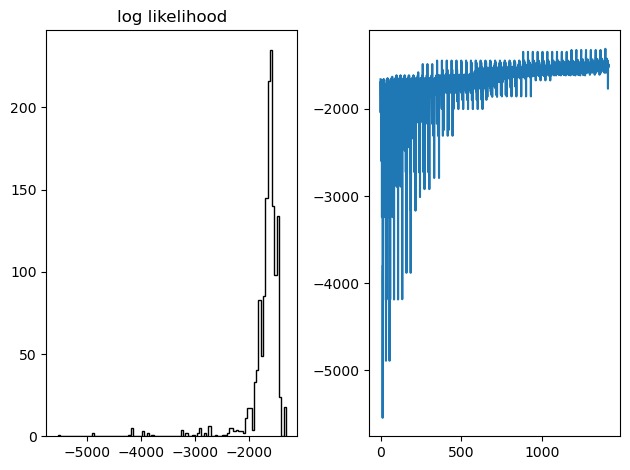

In [ ]:

def plot_log_likelihood(index,discard=1):
    filename = df_all["save_folder"][index] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    flat_samples = reader.get_log_prob(discard=discard,flat=True)
    fig, axes = plt.subplots(1,2)
    flat_samples = flat_samples[flat_samples>-10e3]
    hist = axes[0].hist(flat_samples, 100, color="k", histtype="step")
    axes[0].set_title("log likelihood")
    axes[1].plot(np.arange(len(flat_samples)),flat_samples)
    fig.tight_layout()
    return fig, axes

plot_log_likelihood(3,discard=0)


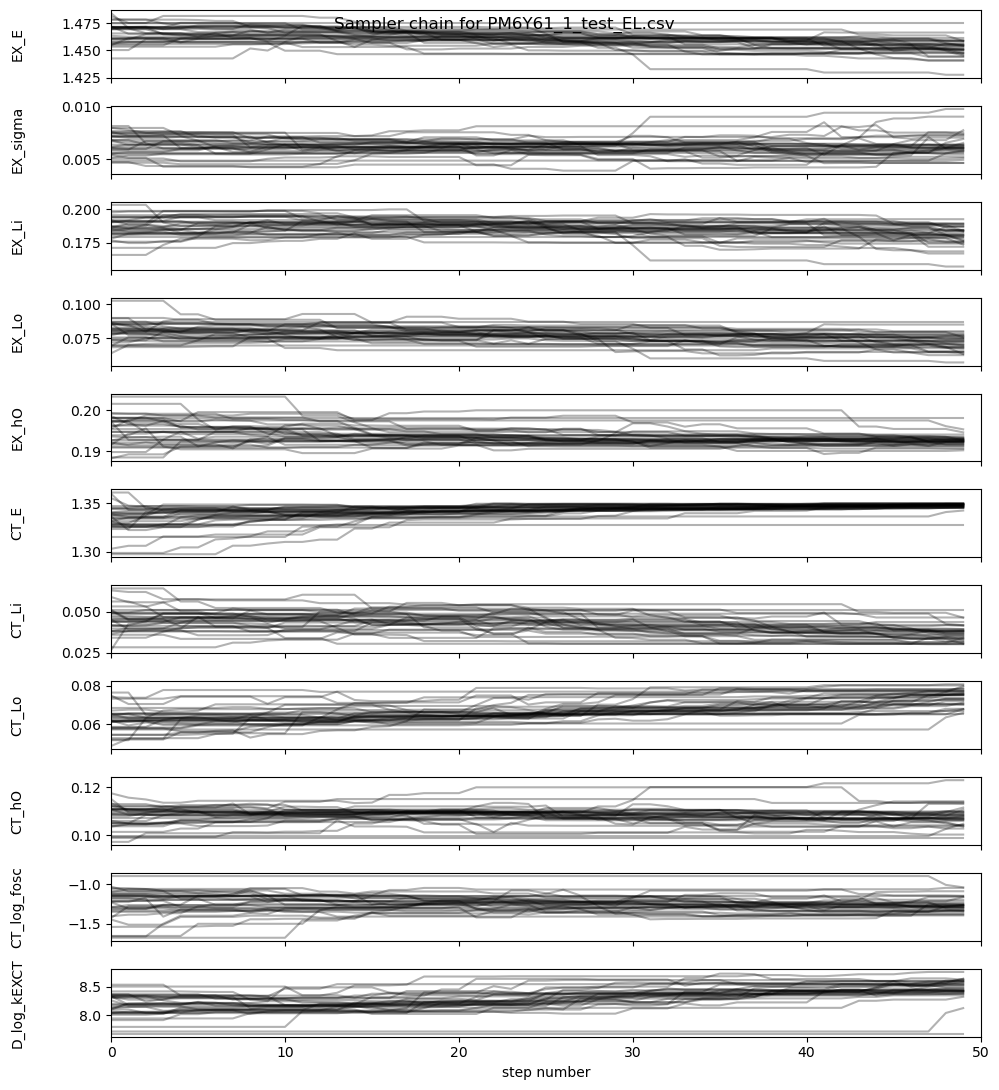

In [ ]:
def plot_chains(id):
    filename = df_all["save_folder"][id] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    samples = reader.get_chain()
    labels=[]
    params_to_fit = df_all["params_to_fit_init"][id]
    for key in params_to_fit.keys():
        for keys in params_to_fit[key].keys():
            labels.append(f"{key}_{keys}")
    ndim = len(labels)
    fig, axes = plt.subplots(ndim, figsize=(10, ndim*1), sharex=True)
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("step number")
    fig.tight_layout()
    fig.suptitle(f"Sampler chain for {df_all['csv_name_pl'][id].split('/')[-1]}")

    fig.show()
plot_chains(id=3)

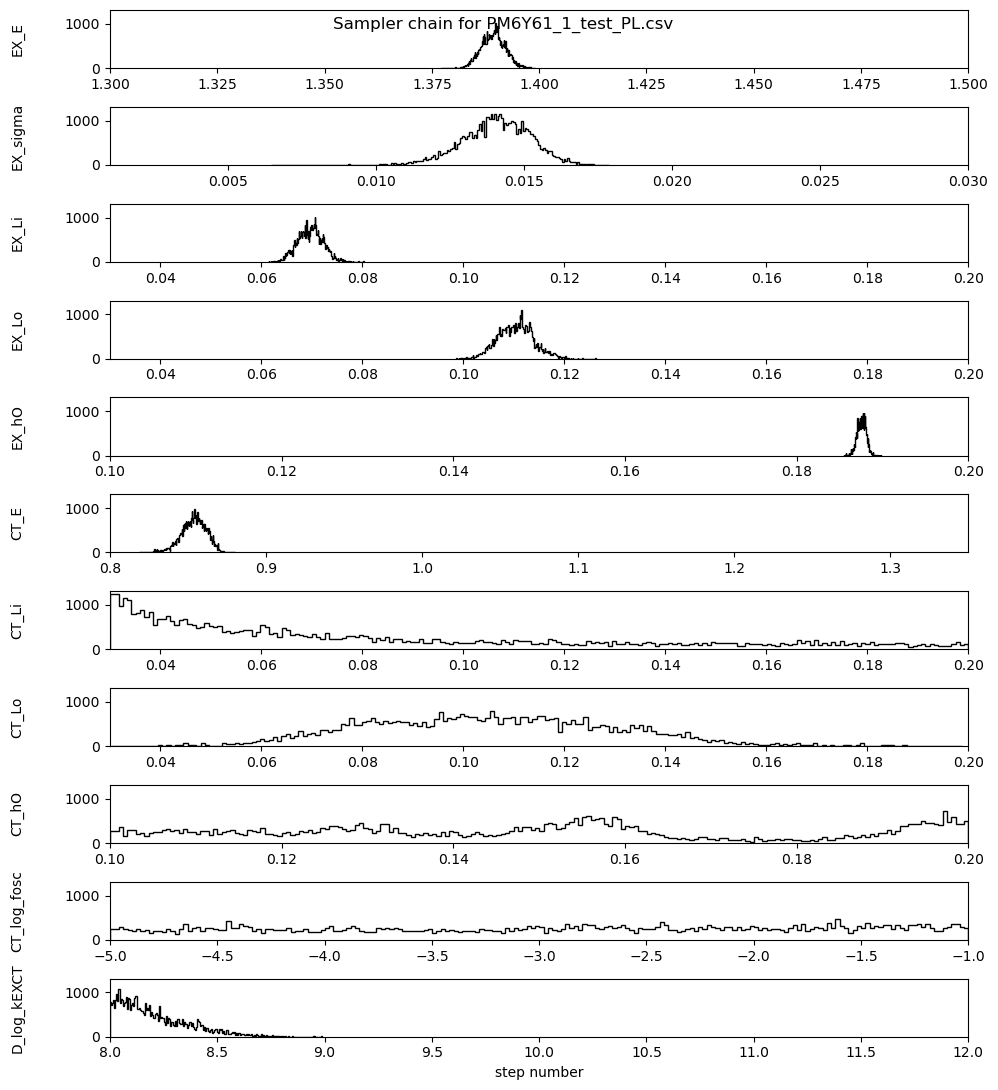

In [ ]:
def plot_distribution(id,discard = 0):
    filename = df_all["save_folder"][id] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    samples = reader.get_chain(discard=discard,flat=True)
    labels=[]
    min_bound,max_bound = [],[]
    params_to_fit = df_all["params_to_fit_init"][id]
    for key in params_to_fit.keys():
        for keys in params_to_fit[key].keys():
            labels.append(f"{key}_{keys}")
            min_bound.append(df_all["min_bounds"][id][key][keys])
            max_bound.append(df_all["max_bounds"][id][key][keys])
    ndim = len(labels)
    fig, axes = plt.subplots(ndim, figsize=(10, ndim*1),sharey=True)
    for i in range(ndim):
        ax = axes[i]
        ax.hist(samples[:, i], 200, color="k", histtype="step")
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        ax.set_xlim(min_bound[i],max_bound[i])
    axes[-1].set_xlabel("step number")
    fig.tight_layout()
    fig.suptitle(f"Sampler chain for {df_all['csv_name_pl'][id].split('/')[-1]}")

    fig.show()
plot_distribution(5,discard=2000)

{'EX': {'E': 1.4616864710259578,
  'sigma': 0.005937228164064453,
  'Li': 0.1934577918840886,
  'Lo': 0.07082741376220858,
  'hO': 0.1920391126469753},
 'CT': {'E': 1.3463992938645806,
  'Li': 0.04957517597138058,
  'Lo': 0.06385787519070371,
  'hO': 0.10820132313311387,
  'log_fosc': -1.1172749653286425},
 'D': {'log_kEXCT': 8.129112480777636}}

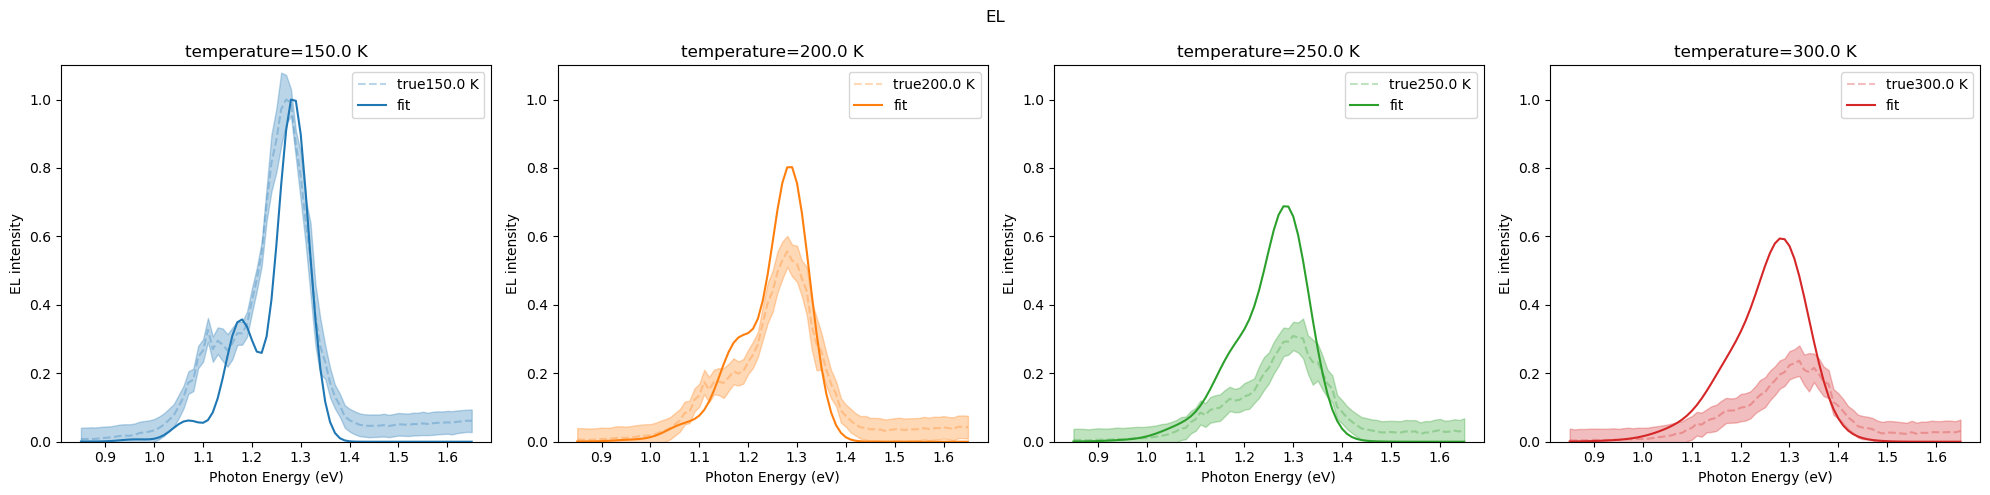

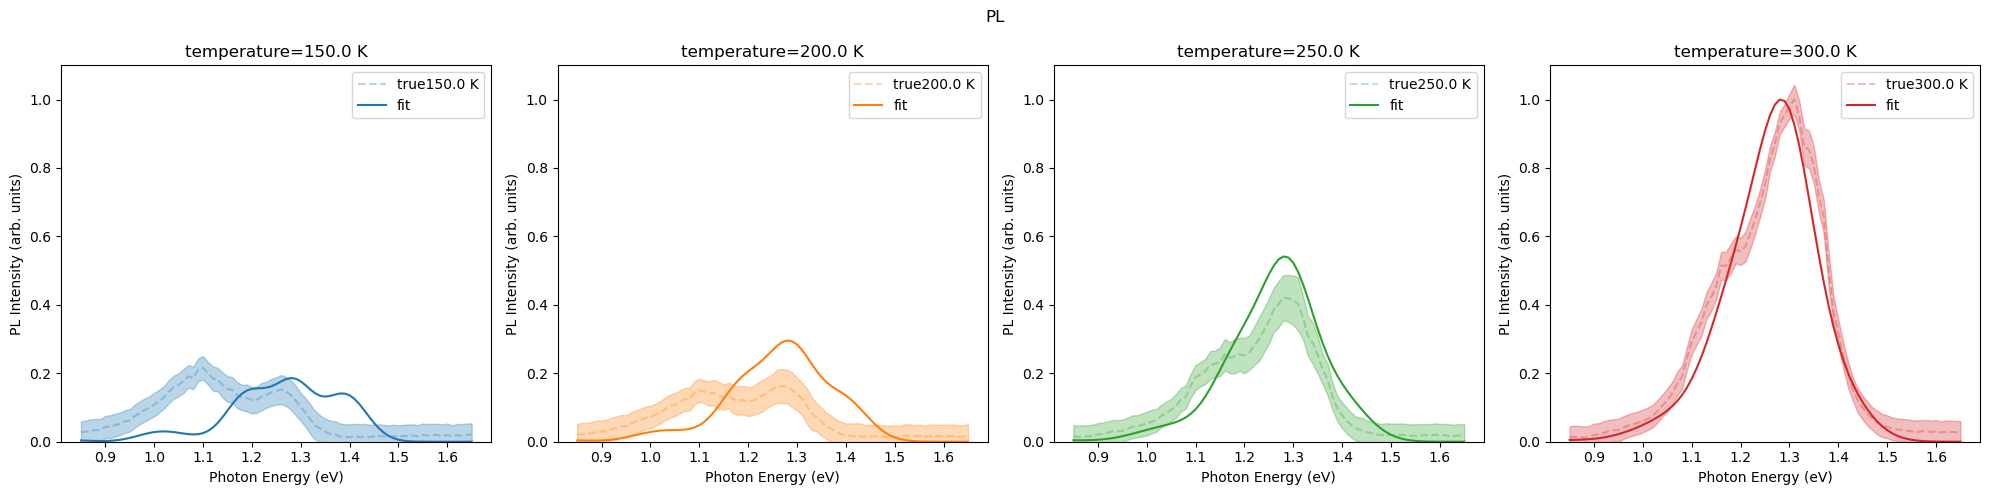

In [ ]:
import importlib

importlib.reload(fit_el_utils)
importlib.reload(generate_data_utils)
def plot_fit_results(id,discard=0):
    filename = df_all["save_folder"][id] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    Exp_data_pl, temperature_list_pl, hws_pl = Exp_data_utils.read_data(df_all["csv_name_pl"][id])
    Exp_data_el, temperature_list_el, hws_el = Exp_data_utils.read_data(df_all["csv_name_el"][id])
    sample = reader.get_chain(discard=discard,flat=True)
    sample_num = np.random.randint(0, sample.shape[0])
    data_fit = sample[sample_num,:]
    true_parameters = fit_el_utils.get_param_dict(df_all["params_to_fit_init"][id],data_fit)
    csv_name_el =df_all["csv_name_el"][id]
    csv_name_pl = df_all["csv_name_pl"][id]
    # Load the data
    Exp_data_pl, temperature_list_pl, hws_pl = Exp_data_utils.read_data(
        csv_name_pl
    )
    Exp_data_el, temperature_list_el, hws_el = Exp_data_utils.read_data(
        csv_name_el
    )
    # Load the model config
    model_config, model_config_save = config_utils.load_model_config(
        df_all["test_id"][id]
    )
    fixed_parameters_dict, params_to_fit_init, min_bounds, max_bounds = (
        config_utils.get_dict_params(model_config_save)
    )
    model_config["temperature_list_el"] = temperature_list_el
    model_config["hws_el"] = hws_el
    model_config["temperature_list_pl"] = temperature_list_pl
    model_config["hws_pl"] = hws_pl
    co_var_mat_pl, co_var_mat_el, variance_el, variance_pl = (
        covariance_utils.get_covariance_matrix_for_data(
            model_config,
            fixed_parameters_dict=fixed_parameters_dict,
            params_to_fit=true_parameters,
        )
    )
    fit_el_utils.plot_exp_data_with_variance(
        temperature_list_el,
        hws_el,
        temperature_list_pl,
        hws_pl,
        variance_el,
        variance_pl,
        df_all["save_folder"][id],
        fixed_parameters_dict,
        true_parameters,
        Exp_data_pl,
        Exp_data_el,
    )
    return true_parameters
true_parameters = plot_fit_results(3,discard=0)
true_parameters

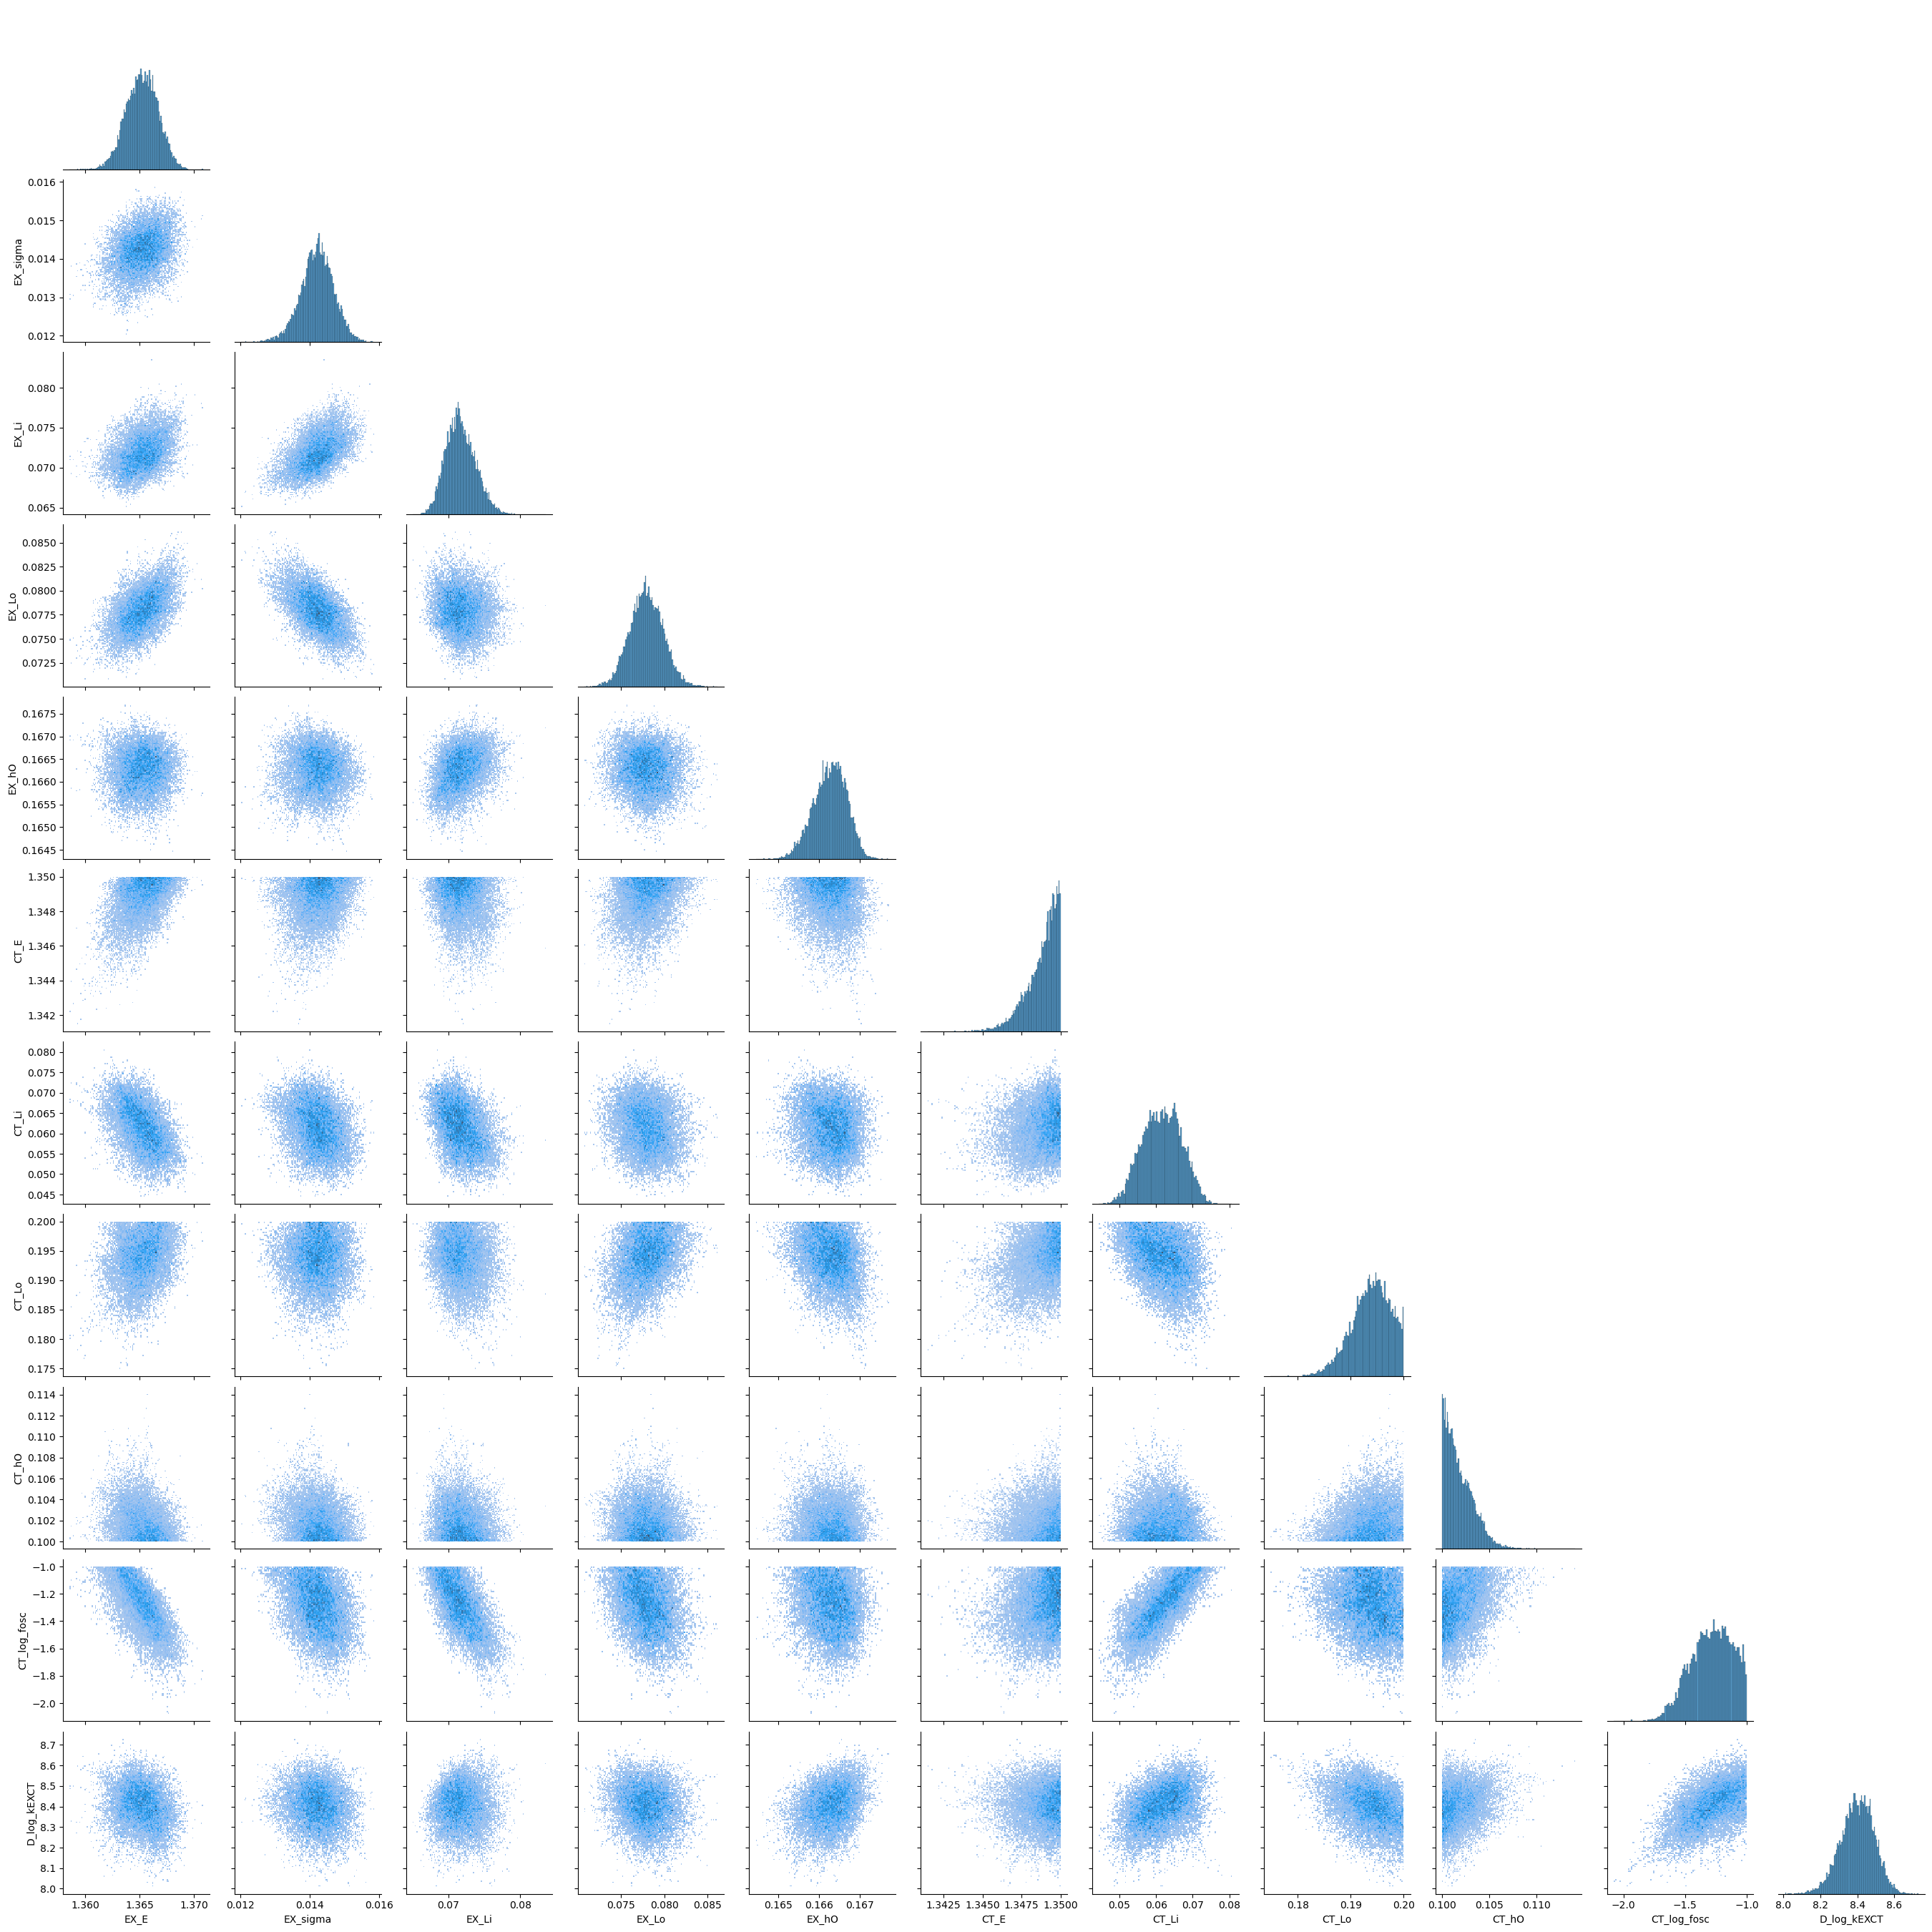

In [ ]:
# plot a pair grid plot
import seaborn as sns


#plot posterior predictive
def plot_pair_plot(id,discard=0,set_axis_limits=True):
    filename = df_all["save_folder"][id] + "/sampler.h5"
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    samples = reader.get_chain(discard= discard, flat=True)
    labels=[]
    min_bound,max_bound = {},{}
    params_to_fit = df_all["params_to_fit_init"][id]
    for key in params_to_fit.keys():
        for keys in params_to_fit[key].keys():
            labels.append(f"{key}_{keys}")
            min_bound[f"{key}_{keys}"] = df_all["min_bounds"][id][key][keys]
            max_bound[f"{key}_{keys}"] = df_all["max_bounds"][id][key][keys]

    ndim = len(labels)
    df_samples = pd.DataFrame(samples, columns=labels)
    g = sns.pairplot(df_samples, kind="hist", corner=True)
    if set_axis_limits:
        for i,ax in enumerate(g.figure.axes):
            if ax.get_xlabel() in min_bound:
                ax.set_xlim(min_bound[ax.get_xlabel()],max_bound[ax.get_xlabel()])
            if ax.get_ylabel() in min_bound:
                ax.set_ylim(min_bound[ax.get_ylabel()],max_bound[ax.get_ylabel()])
    g.figure.show()
    return g
g = plot_pair_plot(0,discard=2000,set_axis_limits=False)